# Notebook to test model predictions

### Clip

In [20]:
from aircraft_anomaly_detection.models.clip_predictor import CLIP

predictor = CLIP(class_names=["damaged", "undamaged"])

# Predict all images in a folder
folder_preds = predictor.predict("../data/no_defect/")
print(folder_preds)


{'detail_jet-engine-part.jpg': [{'label': 'undamaged', 'confidence': 79.66}, {'label': 'damaged', 'confidence': 20.34}], 'gpt_generated.jpg': [{'label': 'undamaged', 'confidence': 85.23}, {'label': 'damaged', 'confidence': 14.77}], 'gpt_generated_2.png': [{'label': 'damaged', 'confidence': 66.8}, {'label': 'undamaged', 'confidence': 33.2}], 'gpt_generated_3.png': [{'label': 'undamaged', 'confidence': 84.01}, {'label': 'damaged', 'confidence': 15.99}]}


### Grouding Dino + SAM

final text_encoder_type: bert-base-uncased


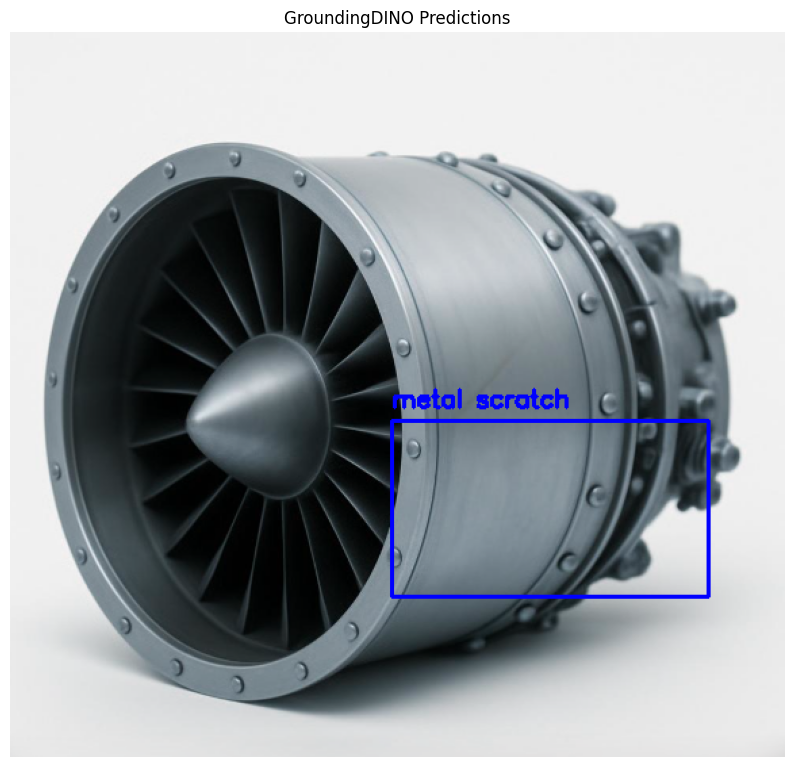

In [16]:
from aircraft_anomaly_detection.models.dino import DINO
from aircraft_anomaly_detection.models.sam import SAM

#image_path = "../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_1.jpg"
image_path = "../data/no_defect/gpt_generated_3.png"
text_prompt = "metal scratch"

# Init models
dino = DINO(
    config_path="../src/aircraft_anomaly_detection/models/config/GroundingDINO_SwinT_OGC.py",
    weights_path="../data/weights/groundingdino_swint_ogc.pth",
)

# DINO prediction
boxes, phrases = dino.predict(image_path, prompt=text_prompt, box_threshold=0.5)
dino.plot(image_path, boxes, phrases)

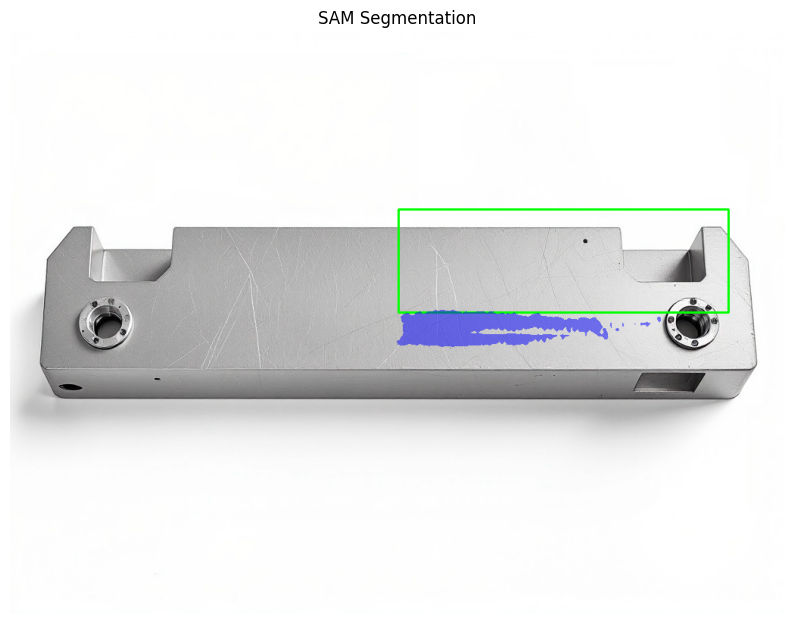

In [2]:
sam = SAM(
    checkpoint_path="../data/weights/sam_vit_h_4b8939.pth",
    model_type="vit_h",
)

masks = sam.predict(image_path, boxes, filter=False)
sam.plot(image_path, boxes, masks, filter=False)

### Owlvit

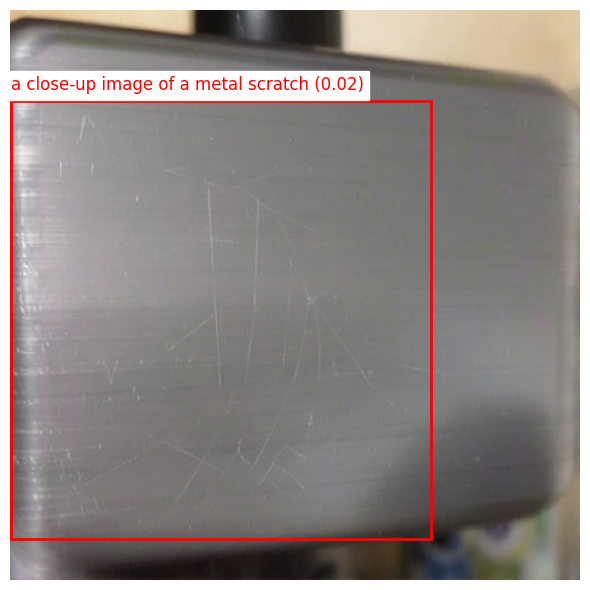

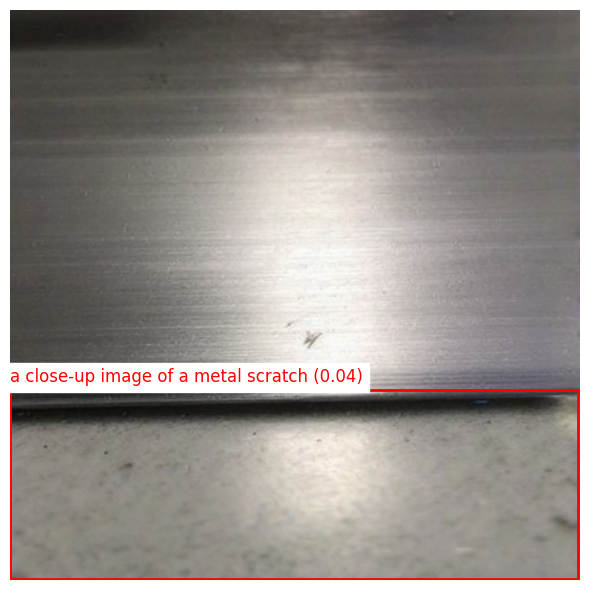

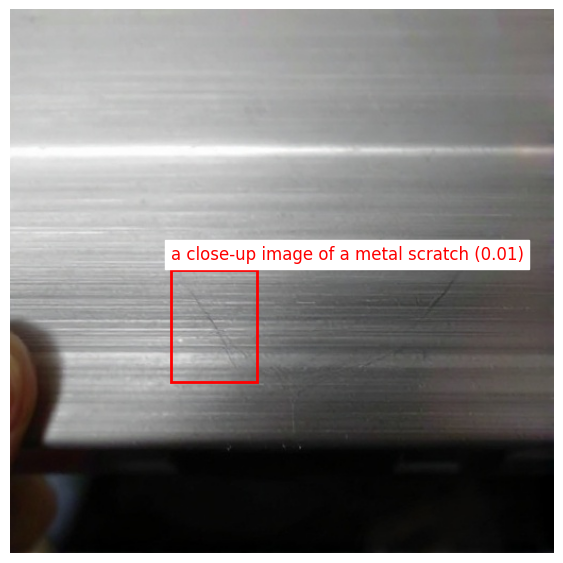

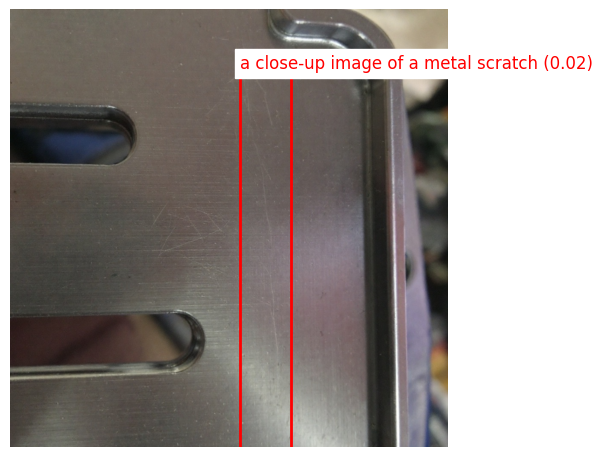

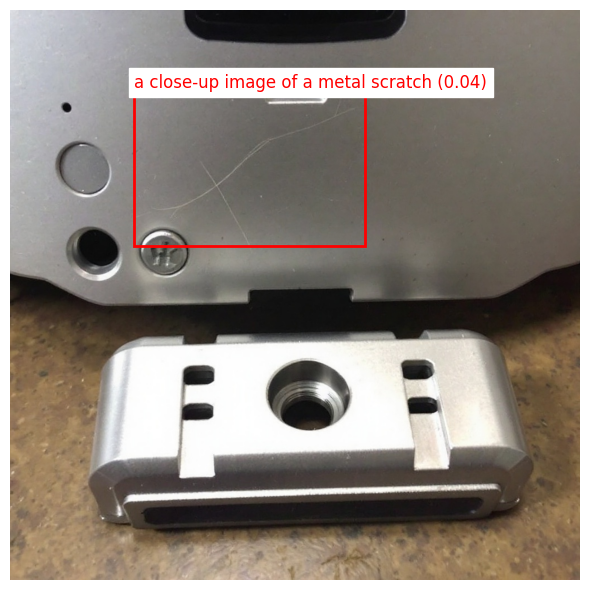

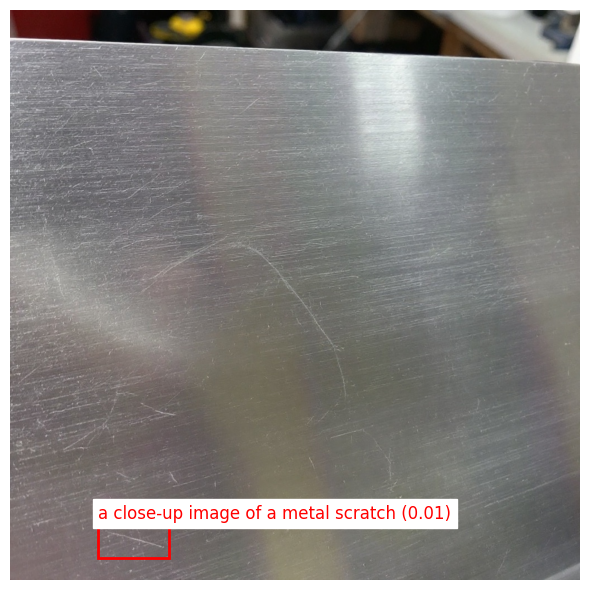

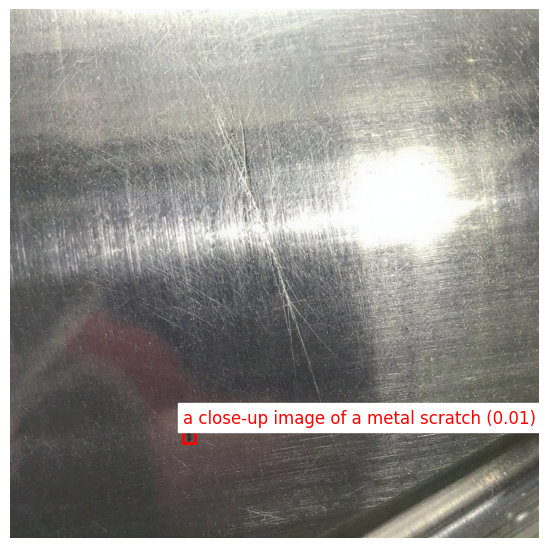

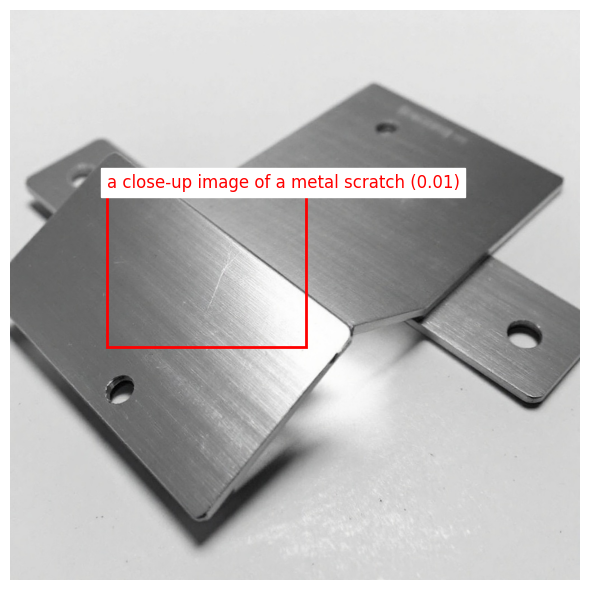

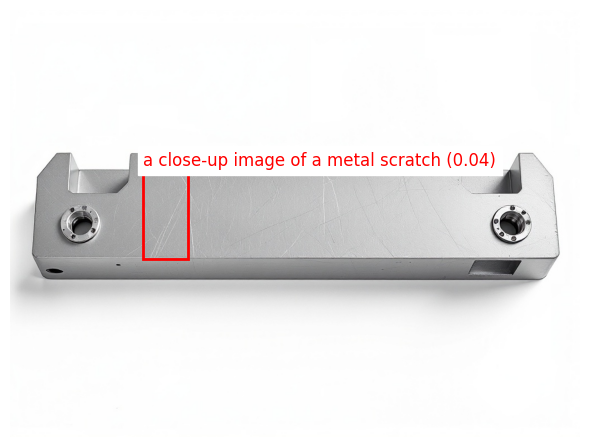

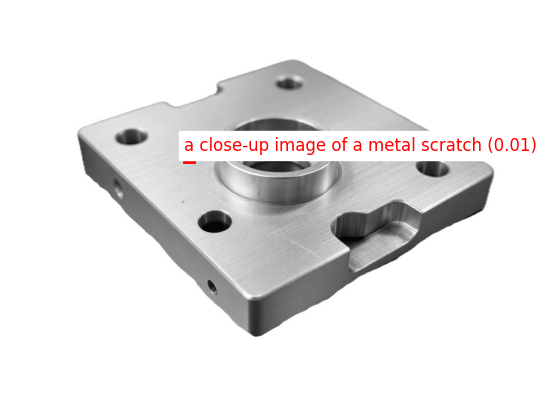

In [3]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

model_path = "../data/weights/owlvit"
for i in range(1, 11):
    image_path = f"../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_{i}.jpg"
    #image_path = "../data/no_defect/detail_jet-engine-part.jpg"
    texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

    owlvit = OwlViT(model_path)
    image, boxes, scores, labels = owlvit.predict(
        image_path=image_path,
        text_prompts=texts,
        undamaged_idxes=[0],
        top_k=1
    )

    owlvit.plot(image, texts, boxes, labels, scores)


No defect found
No defect found


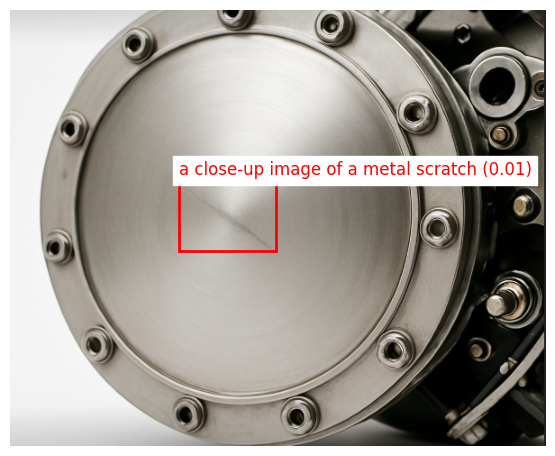

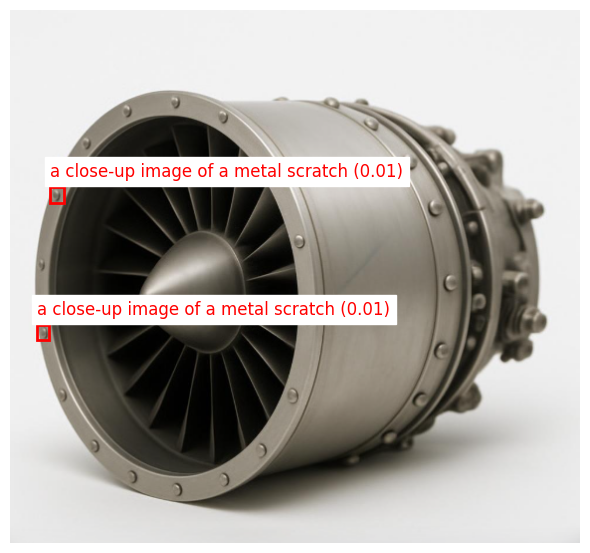

In [ ]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

model_path = "../data/weights/owlvit"

image_path_no_defect = ["../data/no_defect/detail_jet-engine-part.jpg", "../data/no_defect/gpt_generated.jpg", \
                        "../data/no_defect/gpt_generated_3.png"]
texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

owlvit = OwlViT(model_path)
for image_path in image_path_no_defect:
    image, boxes, scores, labels = owlvit.predict(
        image_path=image_path,
        text_prompts=texts,
        undamaged_idxes=[0],
        top_k=2
    )

    owlvit.plot(image, texts, boxes, labels, scores)